In [ ]:
print("q1")

In [2]:
# To plot pretty figures
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "data_viz_group"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
import pandas as pd

#load the csv file 
df = pd.read_csv('data.csv', usecols=[1,2,3])

#display first 5 rows 
df.head()

,To what extent do you believe the online safety act makes the internet safer for users from harm?,What types of cyber-harm is the online safety act most effective at addressing?,Will the Online Safety Act help hold tech companies more accountable for user safety?
0,1,None of the above,Strongly disagree
1,2,Child Protection Onine,Disagree
2,1,None of the above,Strongly disagree
3,1,None of the above,Strongly disagree
4,4,"Cyberbullying/Harassment, Illegal Content, Chi...",Strongly agree


In [4]:
#checking for missing values in each column
df.isna().sum()

To what extent do you believe the online safety act makes the internet safer for users from harm?    0
What types of cyber-harm is the online safety act most effective at addressing?                      0
Will the Online Safety Act help hold tech companies more accountable for user safety?                0
dtype: int64

In [5]:
#fixing spelling error for a better presentation
#df["What types of cyber-harm is the online safety act most effective at addressing?"]=df["What types of cyber-harm is the online safety act most effective at addressing?"].replace({
#        'Child Protection Onine': 'Child Protection Online'})

In [6]:
#changing data type for q3
#df["Will the Online Safety Act help hold tech companies more accountable for user safety?"]=df["Will the Online Safety Act help hold tech companies more accountable for user safety?"].astype('category')

company_accountability_dtype = pd.CategoricalDtype(
    categories=['Strongly disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree'],
    ordered=True,
)

df["Will the Online Safety Act help hold tech companies more accountable for user safety?"]=df["Will the Online Safety Act help hold tech companies more accountable for user safety?"].astype(company_accountability_dtype)
df["Will the Online Safety Act help hold tech companies more accountable for user safety?"].dtype

CategoricalDtype(categories=['Strongly disagree', 'Disagree', 'Neutral', 'Agree',
                  'Strongly agree'],
, ordered=True, categories_dtype=object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column                                                                                             Non-Null Count  Dtype   
---  ------                                                                                             --------------  -----   
 0   To what extent do you believe the online safety act makes the internet safer for users from harm?  13 non-null     int64   
 1   What types of cyber-harm is the online safety act most effective at addressing?                    13 non-null     object  
 2   Will the Online Safety Act help hold tech companies more accountable for user safety?              13 non-null     category
dtypes: category(1), int64(1), object(1)
memory usage: 565.0+ bytes


In [8]:
df.describe()

,To what extent do you believe the online safety act makes the internet safer for users from harm?
count,13.000000
mean,2.461538
std,1.198289
min,1.000000
25%,2.000000
50%,2.000000
75%,4.000000
max,4.000000


In [9]:
#question 1 value counts
df["To what extent do you believe the online safety act makes the internet safer for users from harm?"].value_counts()

To what extent do you believe the online safety act makes the internet safer for users from harm?
2    5
4    4
1    3
3    1
Name: count, dtype: int64

In [10]:
#question 2 value counts based on individual responses 
df["What types of cyber-harm is the online safety act most effective at addressing?"].value_counts()

What types of cyber-harm is the online safety act most effective at addressing?
None of the above                                                                    3
Illegal Content                                                                      3
Child Protection Onine                                                               1
Illegal Content, Child Protection Onine                                              1
Cyberbullying/Harassment, Illegal Content, Child Protection Onine                    1
Cyberbullying/Harassment, Child Protection Onine                                     1
Misinformation, Child Protection Onine                                               1
Cyberbullying/Harassment, Misinformation, Illegal Content, Child Protection Onine    1
Illegal Content, Child Protection Onine, Censorship                                  1
Name: count, dtype: int64

In [11]:
#question 2 value counts for each category 
# Split by comma, trim spaces
df["What types of cyber-harm is the online safety act most effective at addressing?"] = df["What types of cyber-harm is the online safety act most effective at addressing?"].apply(
    lambda x: [i.strip() for i in x.split(',')] if isinstance(x, str) else x
)

# Expand each harm into its own row
df_expanded = df.explode("What types of cyber-harm is the online safety act most effective at addressing?").reset_index(drop=True)

df_expanded.head()

,To what extent do you believe the online safety act makes the internet safer for users from harm?,What types of cyber-harm is the online safety act most effective at addressing?,Will the Online Safety Act help hold tech companies more accountable for user safety?
0,1,None of the above,Strongly disagree
1,2,Child Protection Onine,Disagree
2,1,None of the above,Strongly disagree
3,1,None of the above,Strongly disagree
4,4,Cyberbullying/Harassment,Strongly agree


In [12]:
df_expanded["What types of cyber-harm is the online safety act most effective at addressing?"].value_counts()

What types of cyber-harm is the online safety act most effective at addressing?
Child Protection Onine      7
Illegal Content             7
None of the above           3
Cyberbullying/Harassment    3
Misinformation              2
Censorship                  1
Name: count, dtype: int64

In [13]:
#question 3 value counts
df["Will the Online Safety Act help hold tech companies more accountable for user safety?"].value_counts()

Will the Online Safety Act help hold tech companies more accountable for user safety?
Strongly disagree    5
Neutral              3
Agree                2
Strongly agree       2
Disagree             1
Name: count, dtype: int64

Saving figure Q1.1_bar


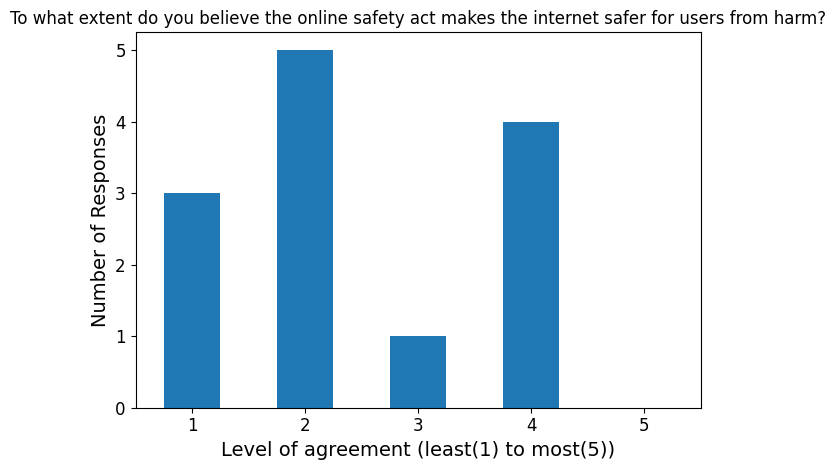

In [15]:
#question 1 histogram 
#df["To what extent do you believe the online safety act makes the internet safer for users from harm?"].hist()
ax = (df['To what extent do you believe the online safety act makes the internet safer for users from harm?'].value_counts()
    .sort_index()
    .reindex([1, 2, 3, 4, 5], fill_value=0)
    .plot.bar(rot=0)
     )
ax.set_xlabel('Level of agreement (least(1) to most(5))')
ax.set_ylabel('Number of Responses')
ax.set_title('To what extent do you believe the online safety act makes the internet safer for users from harm?')
    
save_fig("Q1.1_bar")
plt.show()

Saving figure Q1.2_bar


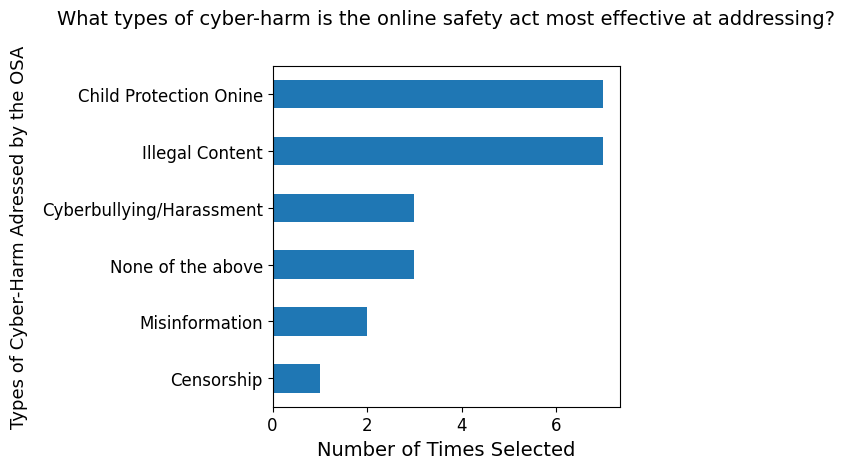

In [91]:
#question 2 
#example code from lab 4 to use for question 2
cyber_counts = df_expanded.groupby('What types of cyber-harm is the online safety act most effective at addressing?').size().sort_values().plot.barh(legend=False)
cyber_counts.set_xlabel('Number of Times Selected')
cyber_counts.set_title('What types of cyber-harm is the online safety act most effective at addressing?',
                      pad=30,
                      fontsize=14)
cyber_counts.set_ylabel('Types of Cyber-Harm Adressed by the OSA',
                       fontsize=13,
                       labelpad=10)

save_fig("Q1.2_bar")
plt.tight_layout()
plt.show()

Saving figure Q1.3_pie


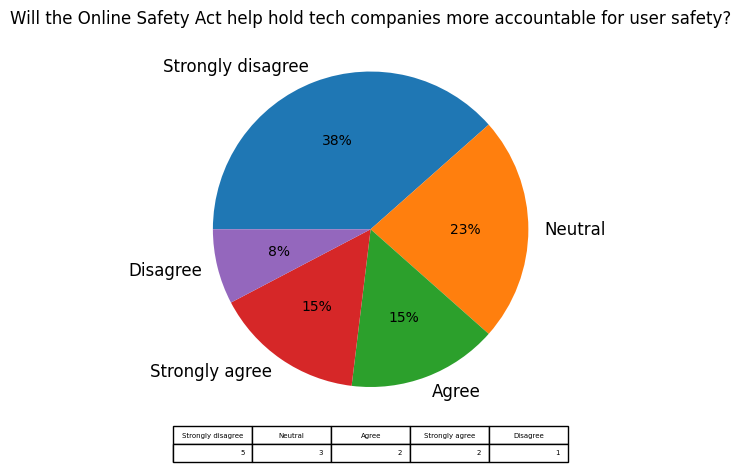

In [92]:
#question 3
#using a pie chart

accountability_counts = df["Will the Online Safety Act help hold tech companies more accountable for user safety?"].value_counts().plot.pie(
    autopct='%1.0f%%',
    startangle=180,
    counterclock=False,
    label='',
    title="Will the Online Safety Act help hold tech companies more accountable for user safety?",
    table=True
)

save_fig("Q1.3_pie")
plt.show()

In [93]:
#exploring relationships between the variables
# column 1 and column 2


def analysis(mean_subset,mean_score_subset):
    harm_scores = []
    
    for harm in ['Cyberbullying/Harassment', 'Illegal Content', 'Child Protection Onine', 'Misinformation', 'Censorship', 'None of the above']:
        subset = df[mean_subset.apply(lambda x: harm in x if isinstance(x, list) else False)]
        mean_score = subset[mean_score_subset].mean()
        count = subset.shape[0]
        harm_scores.append((harm, mean_score, count))
        
    return harm_scores


cyber_safety_scores = analysis(df["What types of cyber-harm is the online safety act most effective at addressing?"],"To what extent do you believe the online safety act makes the internet safer for users from harm?")
harm_df = pd.DataFrame(cyber_safety_scores, columns=['Cyber_Harm', 'Mean_Safety', 'Response_Count'])
harm_df.sort_values('Mean_Safety', ascending=False, inplace=True)
harm_df


,Cyber_Harm,Mean_Safety,Response_Count
3,Misinformation,4.000000,2
0,Cyberbullying/Harassment,3.333333,3
2,Child Protection Onine,3.142857,7
1,Illegal Content,3.000000,7
4,Censorship,2.000000,1
5,None of the above,1.000000,3


Saving figure Cyber_Safety_Relationship


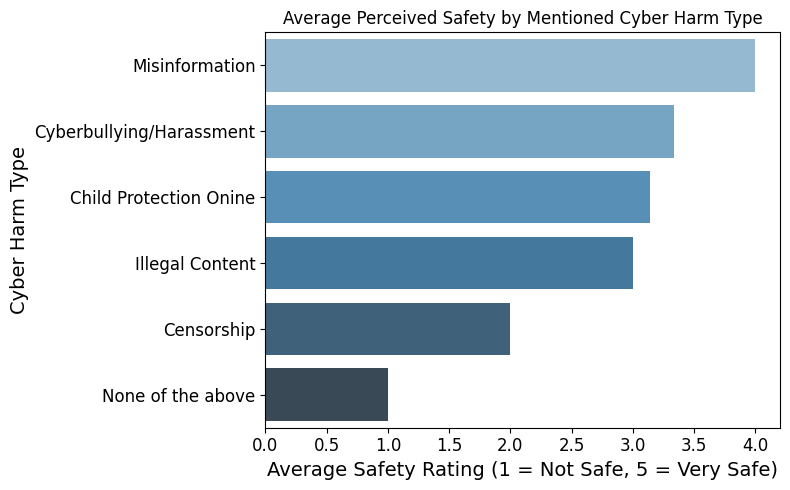

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

sns.barplot(
    data=harm_df,
    x='Mean_Safety',
    y='Cyber_Harm',
    hue='Cyber_Harm',           # assign the hue
    palette='Blues_d',          # use same color scheme
    legend=False                # hide the redundant legend
)

plt.title('Average Perceived Safety by Mentioned Cyber Harm Type')
plt.xlabel('Average Safety Rating (1 = Not Safe, 5 = Very Safe)')
plt.ylabel('Cyber Harm Type')

save_fig("Cyber_Safety_Relationship")
plt.show()



In [95]:
#column 2 and column 3

#df["Will the Online Safety Act help hold tech companies more accountable for user safety?"].unique()
#df.columns.tolist()

df['Accountability_Score'] = df["Will the Online Safety Act help hold tech companies more accountable for user safety?"].cat.codes + 1
#df.head()

cyber_acc_scores = analysis(df["What types of cyber-harm is the online safety act most effective at addressing?"],"Accountability_Score")
harm_acc_df = pd.DataFrame(cyber_acc_scores, columns=['Cyber_Harm', 'Mean_Accountability', 'Response_Count'])
harm_acc_df.sort_values('Mean_Accountability', ascending=False, inplace=True)
harm_acc_df

,Cyber_Harm,Mean_Accountability,Response_Count
0,Cyberbullying/Harassment,4.000000,3
3,Misinformation,3.500000,2
2,Child Protection Onine,3.428571,7
1,Illegal Content,3.000000,7
4,Censorship,1.000000,1
5,None of the above,1.000000,3


Saving figure Cyber_Accountability_Relationship


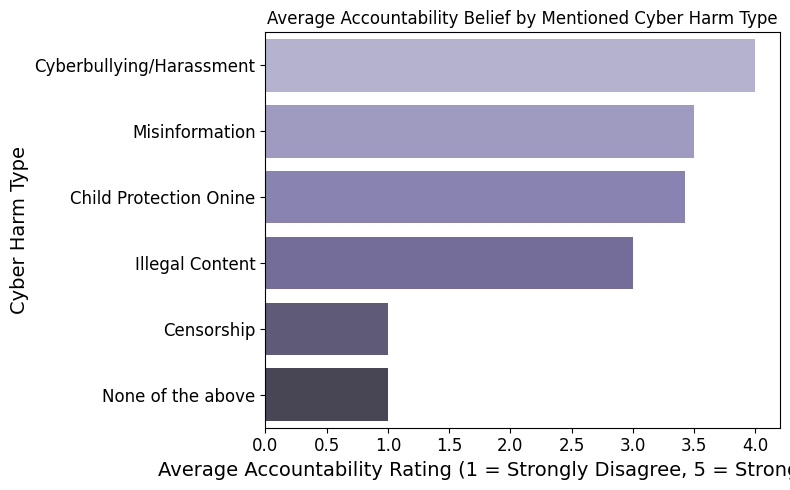

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(
    data=harm_acc_df,
    x='Mean_Accountability',
    y='Cyber_Harm',
    hue='Cyber_Harm',
    palette='Purples_d',
    legend=False
)

plt.title('Average Accountability Belief by Mentioned Cyber Harm Type')
plt.xlabel('Average Accountability Rating (1 = Strongly Disagree, 5 = Strongly Agree)')
plt.ylabel('Cyber Harm Type')

save_fig("Cyber_Accountability_Relationship")
plt.show()


In [97]:
#column 1 and column 3

#giving correlation to show how strong the relationship between these variables is
df[['To what extent do you believe the online safety act makes the internet safer for users from harm?', 'Accountability_Score']].corr()


,To what extent do you believe the online safety act makes the internet safer for users from harm?,Accountability_Score
To what extent do you believe the online safety act makes the internet safer for users from harm?,1.000000,0.728561
Accountability_Score,0.728561,1.000000


Saving figure Safety_Accountabilty_Relationship_Box


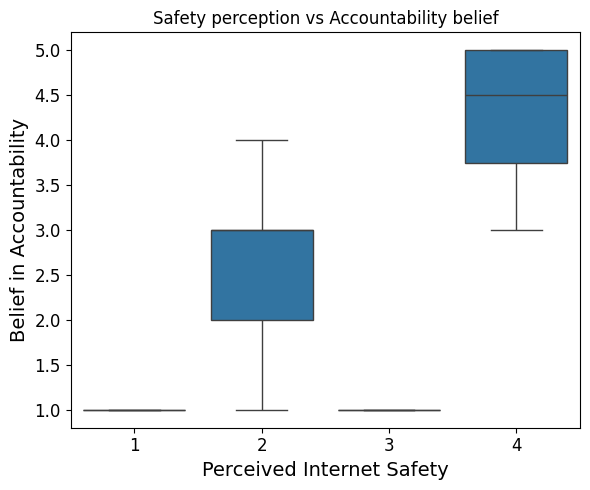

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
sns.boxplot(x='To what extent do you believe the online safety act makes the internet safer for users from harm?', y='Accountability_Score', data=df)
plt.xlabel('Perceived Internet Safety')
plt.ylabel('Belief in Accountability')
plt.title('Safety perception vs Accountability belief')

save_fig("Safety_Accountabilty_Relationship_Box")
plt.show()


Saving figure Safety_Accountabilty_Relationship_Reg


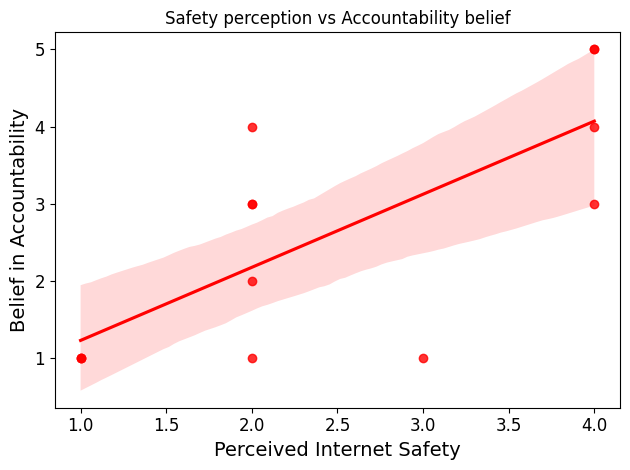

In [99]:
sns.regplot(
    x='To what extent do you believe the online safety act makes the internet safer for users from harm?', 
    y='Accountability_Score', 
    data=df, 
    scatter=True, 
    color='red'
)

plt.xlabel('Perceived Internet Safety')
plt.ylabel('Belief in Accountability')
plt.title('Safety perception vs Accountability belief')

save_fig("Safety_Accountabilty_Relationship_Reg")
plt.show()